In [1]:
use Math::Polygons;
use Physics::Measure :ALL;

$Physics::Measure::round-val = 1;

#This Jupyter notebook shows how Physics::Measure can be combined with simple SVG drawings to 
#illustrate concepts such as calculation of polygon height and area.

#This setup cell inherits from the math classes such as Point and Triangle provided by Math::Polygons and 
#overrides plain Numeric variables with Physics::Measure classes of Length and Area.

class M-Point is Point {
    has Length $.x;
    has Length $.y;
}

class M-Polygon is Polygon {
    has M-Point @.points;
}

class M-Rectangle is Rectangle {
    has M-Point  $.origin;
    has Length   $.width;
    has Length   $.height;

    method area( --> Area ) {
        $!height * $!width
    }
}

class M-Triangle is Triangle {
    has M-Point $.apex is required;
    has Length  $.side is required;

    method height( --> Length ) {
        sqrt($!side**2 - ($!side/2)**2)
    }
    method area( --> Area ) {
        ( $.height * $!side ) / 2
    }
}

(M-Triangle)

Tree Height is 18m (including the base)
Tree Area is 50m^2


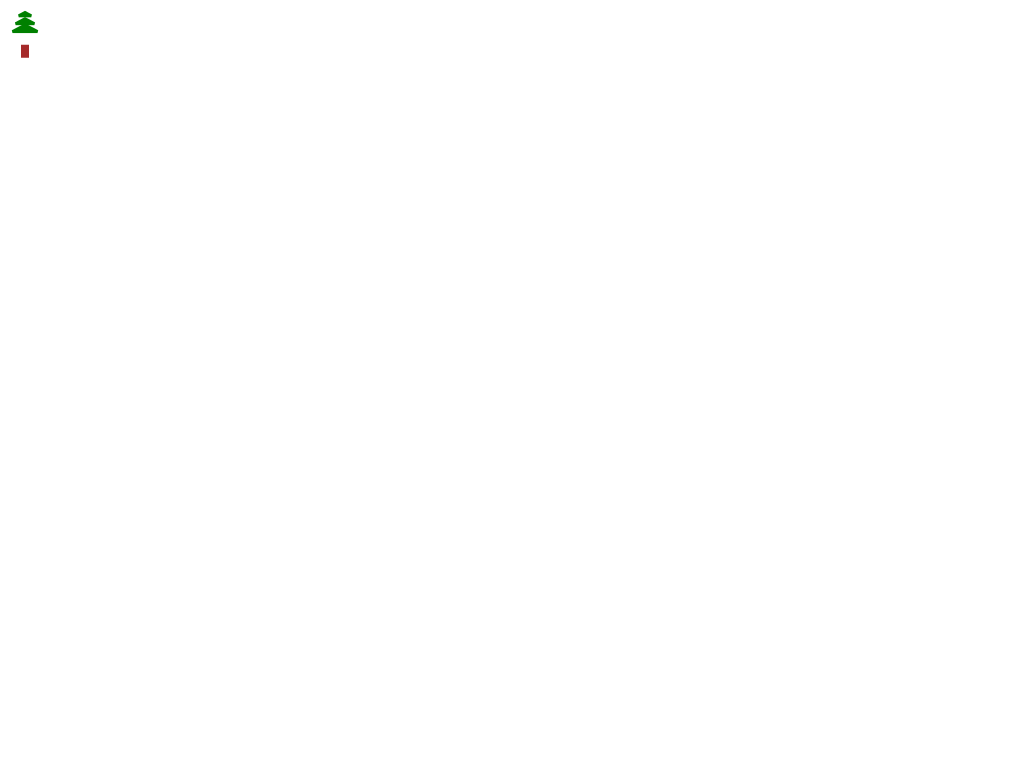

Trapped interrupt.  Please restart the kernel to abort execution.


In [2]:
class M-Tree {
    has M-Point $.apex;
    has Length  $.size;
    
    has M-Triangle  $!top;
    has M-Triangle  $!middle;
    has M-Triangle  $!bottom;
    has M-Rectangle $!base;
    
    method elements {
        [ $!top, $!middle, $!bottom, $!base ]
    }
    method height( --> Length ) {
        [+] $.elements.map(*.height)
    }
    method area( --> Area ) {
        [+] $.elements.map(*.area)
    }
    
    method TWEAK {
        my $stroke := my $fill;
        $fill = "green";
        
        #calculate x co-ords relative to top of drawing, according to height
        my \x := $!apex.x;
        my \s := $!size;
        my \p = [ (s / 4) , ( s * 3/8), (s / 2) ];
        
        $!top    = M-Triangle.new( :$stroke, :$fill,
                                   apex   => M-Point.new(x, p[0]), 
                                   side   => p[0]    );
        $!middle = M-Triangle.new( :$stroke, :$fill,  
                                   apex   => M-Point.new(x, p[1]), 
                                   side   => p[1]    );
        $!bottom = M-Triangle.new( :$stroke, :$fill, 
                                   apex   => M-Point.new(x, p[2]), 
                                   side   => p[2]    );
                                   
        $fill   = "brown";
        $!base  = M-Rectangle.new( :$stroke, :$fill, 
                                   origin  => M-Point.new(( 0.9 * x ), (([+] p) - (0.2 * s))), 
                                   width   => 0.1 * s, 
                                   height  => 0.2 * s );
    }
    
}

#my $size = 200m;
my $size = ♎️ '50 ft';

my M-Point $apex      .= new(($size / 2), ($size / 4));
my M-Tree  $xmas-tree .= new(:$apex, :$size);

say "Tree Height is {$xmas-tree.height} (including the base)";
say "Tree Area is {$xmas-tree.area}";

my $drawing = Drawing.new( elements => $xmas-tree.elements );
$drawing.serialize.say;


In [ ]:
my $tri1 = M-Triangle.new(stroke => "green", fill => "green", 
                apex => M-Point.new(100m, 50m),
                side => 50m, 
            );  
my $tri2 = M-Triangle.new(stroke => "green", fill => "green", 
                apex => M-Point.new(100m, 75m),
                side => 75m, 
            );  
my $tri3 = M-Triangle.new(stroke => "green", fill => "green", 
                apex => M-Point.new(100m, 100m),
                side => 100m,
            );  
my $rect  = M-Rectangle.new(stroke => "brown", fill => "brown",
                origin  => M-Point.new(90m, 185m),
                width   => 20m, 
                height  => 40m, 
            );
            
my @elements =  [ $tri1, $tri2, $tri3, $rect ];
            
say "Tree Height is ", [+] @elements.map(*.height);
say "Tree Area is ",   [+] @elements.map(*.area);

my $tree = Group.new( :@elements );
my $drawing = Drawing.new( elements => $tree );
$drawing.serialize.say;